In [22]:
import os
import anndata
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from py_monocle import learn_graph, order_cells
from py_monocle import compute_cell_states
from py_monocle import regression_analysis

In [2]:
adata = anndata.read_h5ad('C:/Users/hafsa/OneDrive - Imperial College London/PhD/Public datasets/NK studies datasets/adata_crinier_post_scvi.h5ad')

C:\Users\hafsa\AppData\Roaming\Python\Python39\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata

AnnData object with n_obs × n_vars = 24296 × 12049
    obs: 'Sample', 'Study', 'Sequencing_depth', 'Organ', 'Cell labels', '_scvi_batch', '_scvi_labels', 'leiden'
    uns: 'Cell labels_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'scVI normalised'
    obsp: 'connectivities', 'distances'

In [6]:
# remove unknown and match colours to the paga labels
adata_cell_labels = adata[adata.obs['Cell labels'] != 'Unknown']

In [10]:
adata_cell_labels.uns

{'Cell labels_colors': array(['#ff7f0e', '#279e68', '#d62728'], dtype=object),
 'Sample_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#e377c2', '#b5bd61'], dtype=object),
 '_scvi_manager_uuid': 'e73bbd94-c325-4772-a3f1-dd83522b23e1',
 '_scvi_uuid': '2dec39ac-4105-47a9-9fb9-1e44a3bc4e75',
 'leiden': {'params': {'n_iterations': -1,
   'random_state': 0,
   'resolution': 1}},
 'neighbors': {'connectivities_key': 'connectivities',
  'distances_key': 'distances',
  'params': {'method': 'umap',
   'metric': 'euclidean',
   'n_neighbors': 10,
   'random_state': 0,
   'use_rep': 'X_scVI'}},
 'umap': {'params': {'a': 0.5830300198678042, 'b': 1.3341669929396847}}}

In [8]:
umap = adata_cell_labels.obsm['X_umap']
louvain = adata_cell_labels.obs['Cell labels'].tolist()

In [9]:
#Learn the trajectory graph
projected_points, mst, centroids = learn_graph(
  matrix=umap, clusters=louvain,
)

In [18]:
colors

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.49019608, 1.        , 0.47754586, 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]])

C:\Users\hafsa\AppData\Local\Temp\ipykernel_15856\3903393442.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap[:, 0], umap[:, 1], c=cell_colors, s=1, cmap="nipy_spectral")


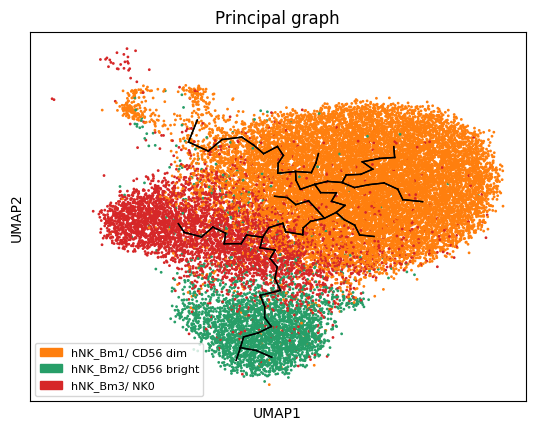

In [33]:
# Plot trajectory graph

# Define the specific colors you want to use
specific_colors = ['#ff7f0e', '#279e68', '#d62728']
# Assuming `louvain` holds your cell labels
unique_labels = np.unique(louvain)  # Extract unique labels

# Create a color map manually with the specific colors
label_color_map = {label: color for label, color in zip(unique_labels, specific_colors)}

# Create a list of colors for each cell based on its label
cell_colors = [label_color_map[label] for label in louvain]


# Plot UMAP

plt.title("Principal graph")
plt.scatter(umap[:, 0], umap[:, 1], c=cell_colors, s=1, cmap="nipy_spectral")

edges = np.array(mst.nonzero()).T
for edge in edges:
  plt.plot(centroids[edge, 0], centroids[edge, 1], c="black", linewidth=1)

# Create legend handles
legend_handles = [Patch(color=label_color_map[label], label=label) for label in unique_labels]

# Add the legend to the plot
plt.legend(handles=legend_handles, loc='lower left', fontsize = 8)

# set the ticks as none
plt.xticks([]),plt.yticks([])

plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

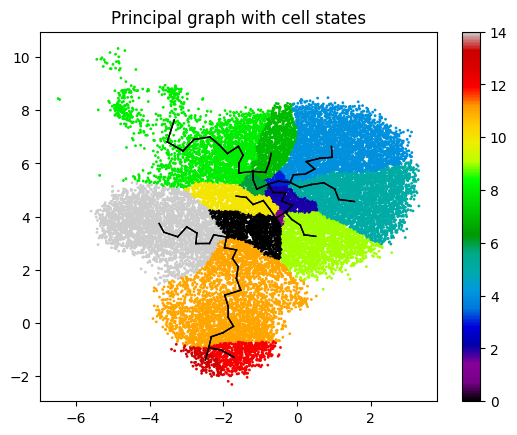

In [20]:
plt.title("Principal graph with cell states")
cell_states, _ = compute_cell_states(umap, centroids, mst)
plt.scatter(umap[:, 0], umap[:, 1], c=cell_states, s=1, cmap="nipy_spectral")
plt.colorbar()
edges = np.array(mst.nonzero()).T
for edge in edges:
  plt.plot(centroids[edge, 0], centroids[edge, 1], c="black", linewidth=1)
plt.show()